Name: Tushar Muley
Date: 18 October 2020
Assignment Chapter 8-1 and 8-2

In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3780892634398387
rmse median 0.4552033961725952


In [4]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [19]:
# Estimate 4
def Estimate4(n=7, iters=10000):

    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('Mean Error xbar', MeanError(means, mu))
    print('Mean Error median', MeanError(medians, mu))
Estimate4()

Experiment 1
Mean Error xbar -0.0011143028183072535
Mean Error median -0.006875254242112878


In [21]:
# Estimate 5
def Estimate5(n=7, iters=10000):

    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

Experiment 2
RMSE biased 0.5179042030925284
RMSE unbiased 0.582426094553459


In [14]:
# I am not 100% sure what I did here. I ran the three experiments at 10,000, 100,000 and 1,000,000 below 
#are my results.

#Experiment 1 1,000,000
#Mean Error xbar 0.0002610110508244663
#Mean Error median 0.0004667961037554451

#Experiment 1 - 100,000
#Mean Error xbar 0.00012276842090913268
#Mean Error median -0.00010063805246254064

#Experiment 1 - 10,000
#Mean Error xbar -0.0011143028183072535
#Mean Error median -0.006875254242112878

#Experiment 2 1,000,000
#RMSE biased 0.5155550530717159
#RMSE unbiased 0.5779974533799438

#Experiment 2 100,000
#RMSE biased 0.5142555704653129
#RMSE unbiased 0.5750266403014507

#Experiment 2 10,000
#RMSE biased 0.5179042030925284
#RMSE unbiased 0.582426094553459

# xbar abd median got lower mean errors I don't think there is any biase.

#The biased estimator reduced as I increased the iters. The biase was always lower compared to the unbiased by 0.06
#and 0.07 for the 10,000 iters.


**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



standard error 0.8139683504798879
confidence interval (1.2922107494318873, 3.841566841115079)


0.8139683504798879

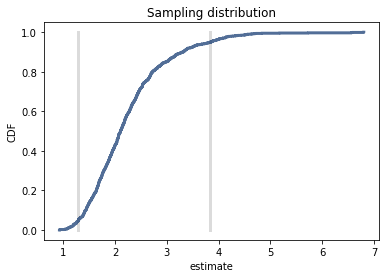

In [22]:
#
def Sample(lam=2, n=10, iters=1000):

    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

Sample()

standard error 1.4806082971396228
confidence interval (1.0800384030183376, 5.055118702933456)


1.4806082971396228

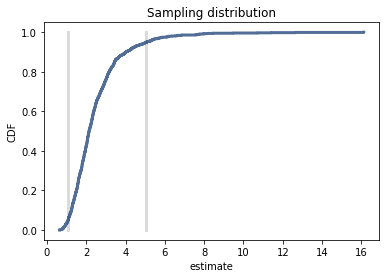

In [23]:
# Simulation 2
def Sample2(lam=2, n=5, iters=1000):

    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

Sample2()

standard error 0.6190475843503864
confidence interval (1.3468791495857075, 3.2513003975485106)


0.6190475843503864

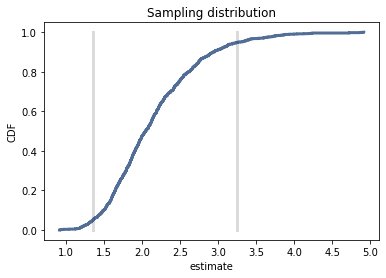

In [24]:
def Sample3(lam=2, n=15, iters=1000):

    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

Sample3()

standard error 0.5017219007516749
confidence interval (1.422958738577586, 3.0303099110703826)


0.5017219007516749

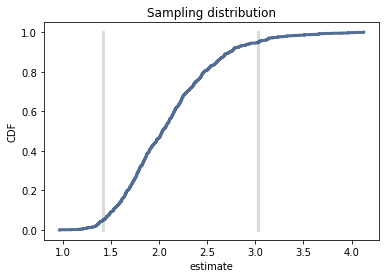

In [25]:
def Sample4(lam=2, n=20, iters=1000):

    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')

    return stderr

Sample4()

#As n increased the standard error decreased. When n=5 standard error was 1.4806 and when n=20 standard error was 0.50172. The confidence intervals went up.

n=5
standard error 1.4806082971396228
confidence interval (1.0800384030183376, 5.055118702933456)

1.4806082971396228

n=10
standard error 0.8139683504798879
confidence interval (1.2922107494318873, 3.841566841115079)

0.8139683504798879

n=15
standard error 0.6190475843503864
confidence interval (1.3468791495857075, 3.2513003975485106)

0.6190475843503864

n=20
standard error 0.5017219007516749
confidence interval (1.422958738577586, 3.0303099110703826)

0.5017219007516749